In [35]:
%reload_ext autoreload
%autoreload 2

In [36]:
import particle_builder as pb
import sam3d as s3d
import open3d as o3d
from psdframe import Frame
from psdstaticdataset import StaticDataset
from pathlib import Path
from matplotlib import pyplot as plt
from segment_anything import build_sam, SamAutomaticMaskGenerator
from util import Voxelize, num_to_natural


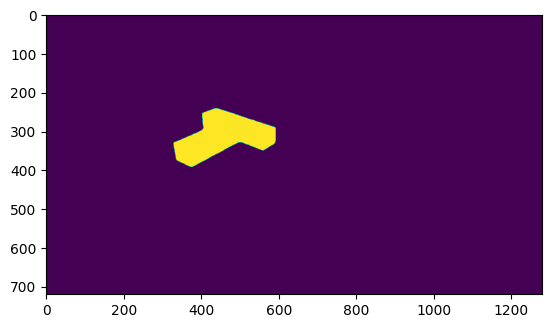

In [37]:
DS_PATH = Path("/home/david/projects/embodied_gaussians/datasets/simulated/single_1/modelling/static")
d = StaticDataset(DS_PATH / "transforms.json")
frames = d.frames
plt.imshow(frames[1].instance.cpu().numpy())
plt.show()

In [57]:
mask_generator = SamAutomaticMaskGenerator(build_sam(checkpoint=pb.sam_checkpoint).to(device="cuda"))
voxelize = Voxelize(voxel_size=pb.VOXEL_SIZE, mode="train", keys=("coord", "color", "group"))
intermediate_outputs_path = Path("/home/david/projects/SegmentAnything3D/outputs/notebook")

In [74]:
pcd_dict = pb.seg_pcd(d, mask_generator, voxelize, intermediate_outputs_path)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pcd_dict['coord'])
pcd.colors = o3d.utility.Vector3dVector(pcd_dict['color'])
o3d.visualization.draw_geometries([pcd])


merging 6 point clouds
merging 3 point clouds
merging 2 point clouds


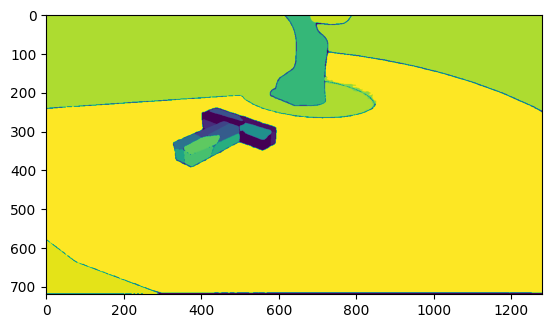

In [41]:
from PIL import Image
import numpy as np
img = Image.open("/home/david/projects/SegmentAnything3D/outputs/notebook/segments/side.png")
group_ids = np.array(img, dtype=np.int16)
plt.imshow(group_ids)
plt.show()

In [77]:
import logging
ch = logging.StreamHandler()
pb.logger.setLevel(logging.DEBUG)
pb.logger.addHandler(ch)

In [142]:
pb.initialize_scene(d, None, intermediate_outputs_path)


Downloading/Locating SAM checkpoint...
Sam checkpoint in located at /home/david/.frame-seg-init/models/sam_vith.pth
Downloading/Locating SAM checkpoint...
Sam checkpoint in located at /home/david/.frame-seg-init/models/sam_vith.pth


merging 6 point clouds
merging 3 point clouds
merging 2 point clouds


Segmented cloud has [-1  0  1  2  3  4] unique groups - [-1  0  1  2  3  4]
Valid groups: [0, 1, 2]
Table group: 1


In [149]:
pcd = o3d.geometry.PointCloud()
mask = pcd_dict['group'] == 0
pcd.points = o3d.utility.Vector3dVector(pcd_dict['coord'][mask] )
pcd.colors = o3d.utility.Vector3dVector(pcd_dict['color'][mask])
#o3d.visualization.draw_geometries([pcd])
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, pb.VOXEL_SIZE*3)
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)

In [160]:
radii = [0.005, 0.01, 0.02, 0.04, 0.001]
mask = pcd_dict['group'] == 0
pcd.points = o3d.utility.Vector3dVector(pcd_dict['coord'][mask] )
pcd.colors = o3d.utility.Vector3dVector(pcd_dict['color'][mask])


#o3d.visualization.draw_geometries([pcd])
#

#mesh.compute_vertex_normals()
pcd.estimate_normals()
#mesh, density = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=9)
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
    pcd, o3d.utility.DoubleVector(radii))
#mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)
 